In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kc_house_data_train.csv')
pd.options.display.max_columns = 999

In [3]:
df.head()

Unnamed: 0          id             date      price  bedrooms  bathrooms  \
0           0  2591820310  20141006T000000   365000.0         4       2.25   
1           1  7974200820  20140821T000000   865000.0         5       3.00   
2           2  7701450110  20140815T000000  1038000.0         4       2.50   
3           3  9522300010  20150331T000000  1490000.0         3       3.50   
4           4  9510861140  20140714T000000   711000.0         3       2.50   

   sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0         2070      8893     2.0           0     0          4      8   
1         2900      6730     1.0           0     0          5      8   
2         3770     10893     2.0           0     2          3     11   
3         4560     14608     2.0           0     2          3     12   
4         2550      5376     2.0           0     0          3      9   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0        2070              0      1986             0    98058  47.4388   
1        1830           1070      1977             0    98115  47.6784   
2        3770              0      1997             0    98006  47.5646   
3        4560              0      1990             0    98034  47.6995   
4        2550              0      2004             0    98052  47.6647   

      long  sqft_living15  sqft_lot15  
0 -122.162           2390        7700  
1 -122.285           2370        6283  
2 -122.129           3710        9685  
3 -122.228           4050       14226  
4 -122.083           2250        4050

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [6]:
df.describe()

Unnamed: 0            id         price      bedrooms     bathrooms  \
count  17290.000000  1.729000e+04  1.729000e+04  17290.000000  17290.000000   
mean    8644.500000  4.565502e+09  5.407395e+05      3.372470      2.111943   
std     4991.337413  2.874656e+09  3.733190e+05      0.939346      0.770476   
min        0.000000  1.000102e+06  7.500000e+04      0.000000      0.000000   
25%     4322.250000  2.114701e+09  3.210000e+05      3.000000      1.500000   
50%     8644.500000  3.903650e+09  4.500000e+05      3.000000      2.250000   
75%    12966.750000  7.301150e+09  6.450000e+05      4.000000      2.500000   
max    17289.000000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  17290.000000  1.729000e+04  17290.000000  17290.000000  17290.000000   
mean    2081.464604  1.524340e+04      1.490312      0.007981      0.238519   
std      920.018539  4.230462e+04      0.538909      0.088985      0.775229   
min      290.000000  5.720000e+02      1.000000      0.000000      0.000000   
25%     1430.000000  5.081250e+03      1.000000      0.000000      0.000000   
50%     1920.000000  7.642000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.072575e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

       ...         grade    sqft_above  sqft_basement      yr_built  \
count  ...  17290.000000  17290.000000   17290.000000  17290.000000   
mean   ...      7.654425   1789.306015     292.158589   1970.792019   
std    ...      1.174718    829.265107     443.151874     29.343516   
min    ...      1.000000    290.000000       0.000000   1900.000000   
25%    ...      7.000000   1200.000000       0.000000   1951.000000   
50%    ...      7.000000   1560.000000       0.000000   1974.000000   
75%    ...      8.000000   2214.500000     560.000000   1996.000000   
max    ...     13.000000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   
mean      83.806304  98078.193175     47.560058   -122.214258    1987.986698   
std      400.329376     53.607949      0.138412      0.140857     684.802635   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471200   -122.329000    1490.000000   
50%        0.000000  98065.000000     47.571600   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.677900   -122.126000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   17290.000000  
mean    12873.475824  
std     27227.437583  
min       659.000000  
25%      5111.250000  
50%      7622.500000  
75%     10101.750000  
max    858132.000000  

[8 rows x 21 columns]

In [6]:
np.corr(df)

NameError: name 'np' is not defined

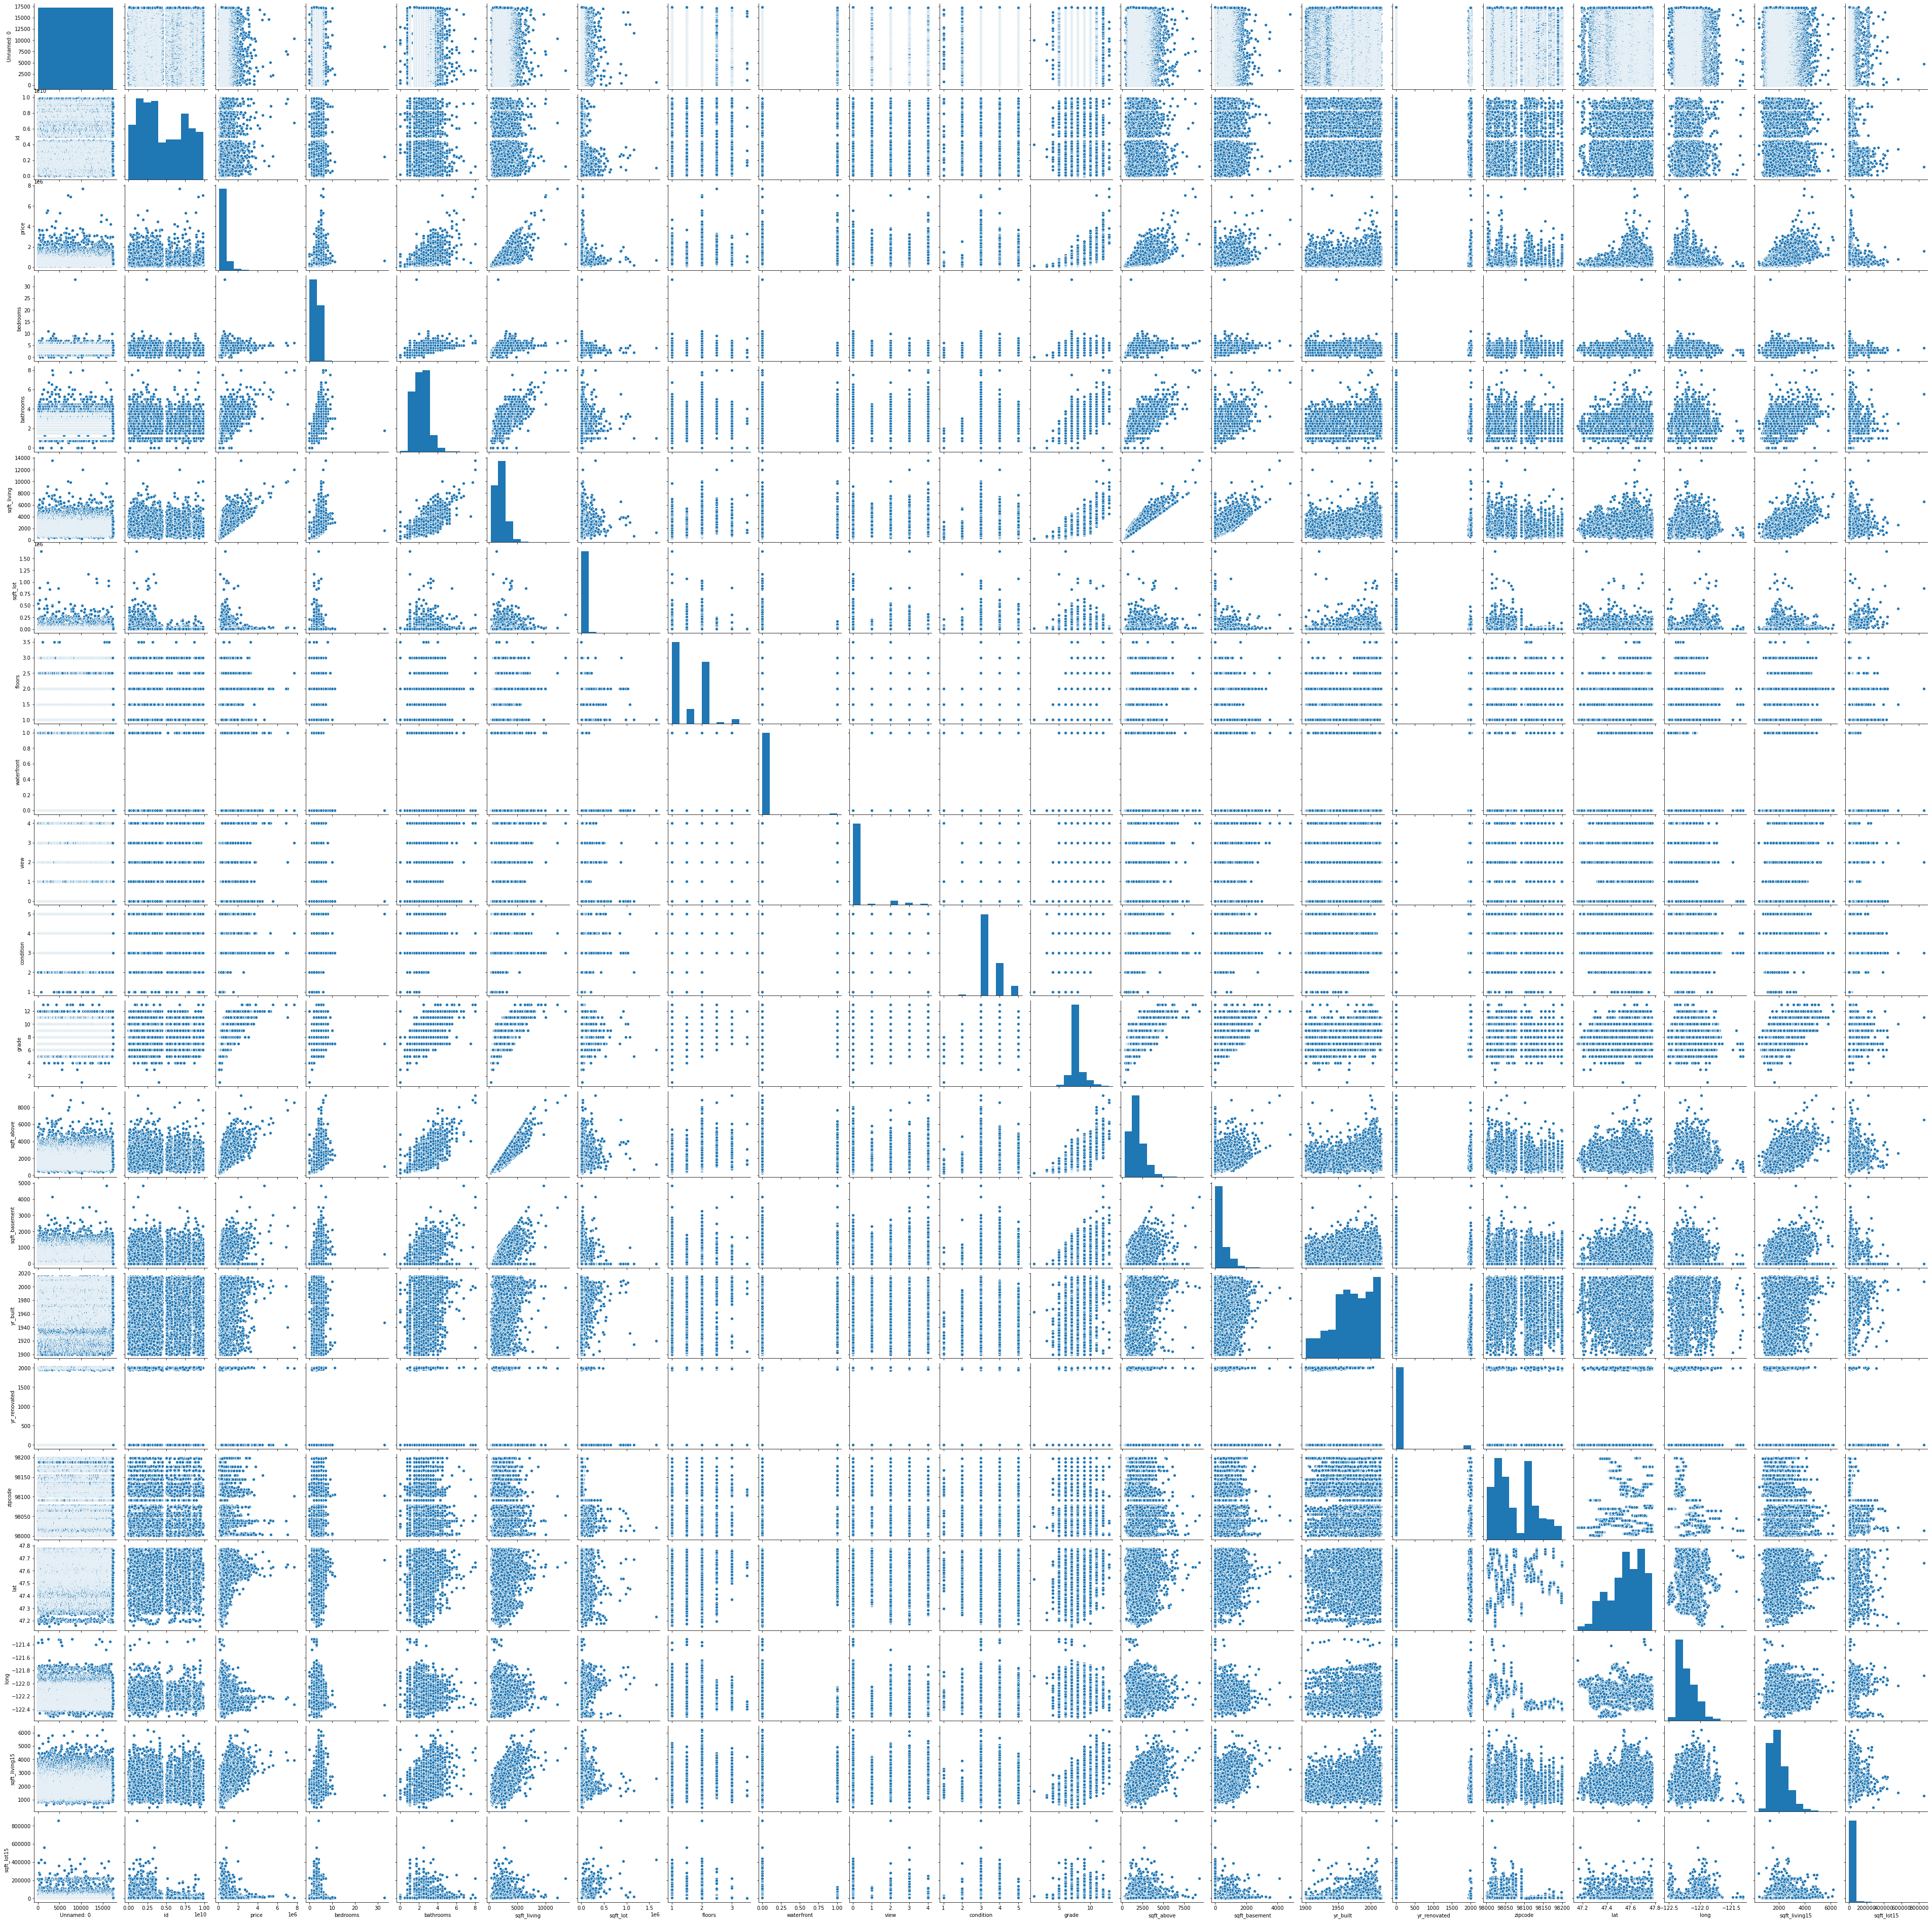

In [9]:
sns.pairplot(df)